# Summer Olympic Games (1896-2016): An EDA

## introduction

The data set containing 120 years of the Olympic Games can be found here: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

This will only be an analysis of the Summer Olympics, so everytime I refer to male/female Olympic athletes, I specifically mean male/female Summer Olympic athletes.

Explanation of each column:

1. ID: unique number for each athlete
2. Name: athlete's name
3. Sex: biological sex of athlete (M or F)
4. Age: age of athlete 
5. Height: height of athlete (in cm)
6. Weight: weight of athlete (in kg)
7. Team: the team that an athlete belongs to
8. NOC - National Olympic Committee (3-letter code for "Team")
9. Games - year and season of Oympic game
10. Year - year of Olympic game
11. Season - season of Olympic game
12. City - Host city of Olympic game
13. Sport - name of Olympic sport
14. Event - name of Olympic sporting event
15. Medal - medal status of athlete (Gold, Silver, Bronze, or NA)

## import and data preparation

In [1]:
# Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
# Load Olympics data into data frames
olympics = pd.read_csv('D:/Jane/Python/python files/datasets/athlete_events.csv')
countries = pd.read_csv('D:/Jane/Python/python files/datasets/noc_regions.csv')

# Join data frames on NOC
olympics = pd.merge(olympics, countries, how='left', on='NOC')

# Only include summer Olympics
olympics = olympics[olympics['Season']=='Summer']

# Show first 5 rows
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


* The id and notes columns do not seem useful, so they could be removed
* NaN values in medal and notes columns can be changed to "None"

In [13]:
# Remove id and notes columns
olympics = olympics.drop(['ID','notes'], axis=1)

# Strip white spaces at the beginning and end of values
olympics = olympics.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# Get basic information about the table
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
Name      222552 non-null object
Sex       222552 non-null object
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null object
NOC       222552 non-null object
Games     222552 non-null object
Year      222552 non-null int64
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null object
Event     222552 non-null object
Medal     34088 non-null object
region    222182 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 17.8+ MB


* 222552 rows, 14 columns
* Can see that age, height, weight, and region columns also have missing values
* Will not replace missing age, height, and weight values with mean or median of the column because some athletes compete in multiple Olympic games so they would have different age values, and maybe different height and weight values, for each game. Other factors like year and region can also produce bias in replaced values because there are height differences in different regions and time (e.g. modern-day people might be taller because we have more nutrients growing up). Lastly, replacing values by certain criteria may result in an insufficient amount of data to use to find the mean or median

In [9]:
# Check which regions are missing
olympics[olympics['region'].isnull()].groupby(['NOC', 'Team']).count()

Name  Sex  Age  Height  Weight  Games  Year  \
NOC Team                                                                    
ROT Refugee Olympic Athletes    12   12   12      12      12     12    12   
SGP June Climene                 3    3    3       3       3      3     3   
    Rika II                      4    4    3       1       1      4     4   
    Singapore                  338  338  327     253     251    338   338   
    Singapore-1                  2    2    2       2       2      2     2   
    Singapore-2                  2    2    2       2       2      2     2   
TUV Tuvalu                       7    7    7       4       6      7     7   
UNK Unknown                      2    2    0       0       0      2     2   

                              Season  City  Sport  Event  Medal  region  
NOC Team                                                                 
ROT Refugee Olympic Athletes      12    12     12     12      0       0  
SGP June Climene                   3     3      3      3      0       0  
    Rika II                        4     4      4      4      0       0  
    Singapore                    338   338    338    338      9       0  
    Singapore-1                    2     2      2      2      0       0  
    Singapore-2                    2     2      2      2      0       0  
TUV Tuvalu                         7     7      7      7      0       0  
UNK Unknown                        2     2      2      2      0       0

### replace some missing values

In [15]:
# Replace missing medal values
olympics['Medal']=olympics['Medal'].replace(to_replace=[None], value=['None'])

# Replace  missing region values
nocs, regions = ['ROT', 'SGP', 'TUV', 'UNK'], ['Refugees', 'Singapore', 'Tuvalu', 'Unknown']
for noc in range(len(nocs)):
    olympics.loc[olympics['NOC']==nocs[noc], 'region'] = olympics.loc[olympics['NOC']==nocs[noc], 'region'].replace(to_replace=[None], value=[regions[noc]])

### final check-ups

In [16]:
# Let us check if every missing value is replaced     
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
Name      222552 non-null object
Sex       222552 non-null object
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null object
NOC       222552 non-null object
Games     222552 non-null object
Year      222552 non-null int64
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null object
Event     222552 non-null object
Medal     222552 non-null object
region    222552 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 17.8+ MB


* All missing region values are replaced, so data types of column values can be changed

In [20]:
# Get summary statistics
olympics.describe()

,Age,Height,Weight,Year
count,213363.000000,170695.000000,168698.00000,222552.000000
mean,25.674053,175.515551,70.68906,1976.317094
std,6.699839,10.914725,14.80394,30.942802
min,10.000000,127.000000,25.00000,1896.000000
25%,21.000000,168.000000,60.00000,1956.000000
50%,24.000000,175.000000,70.00000,1984.000000
75%,28.000000,183.000000,79.00000,2000.000000
max,97.000000,226.000000,214.00000,2016.000000


## data exploration, visualization & analysis

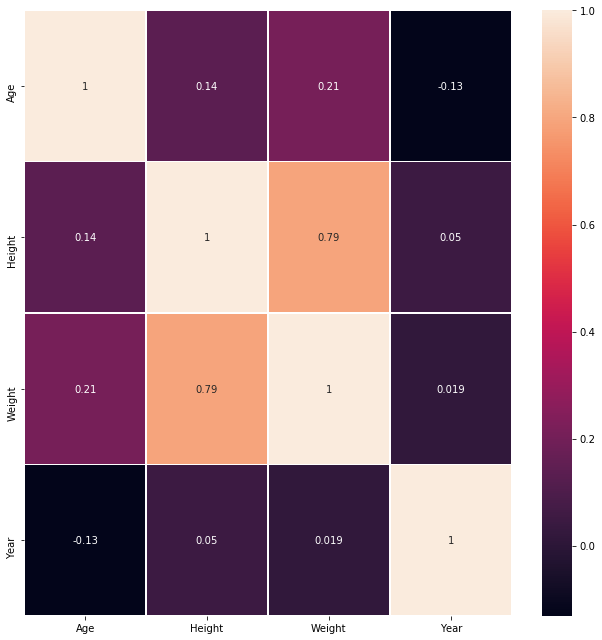

In [17]:
# Correlation matrix of Oylmpics data
olymp_corr = olympics.corr()

# Change figure size 
fig, ax1 = plt.subplots(figsize=(9,9))

# Create heat map of correlation matrix
sn.heatmap(olymp_corr, annot=True, linewidths=.5)

# Remove unnecessary output
plt.tight_layout()

* Strong positive correlation between height and weight
* Very weak correlation or almost no correlations between other columns

### height vs. weight by sex

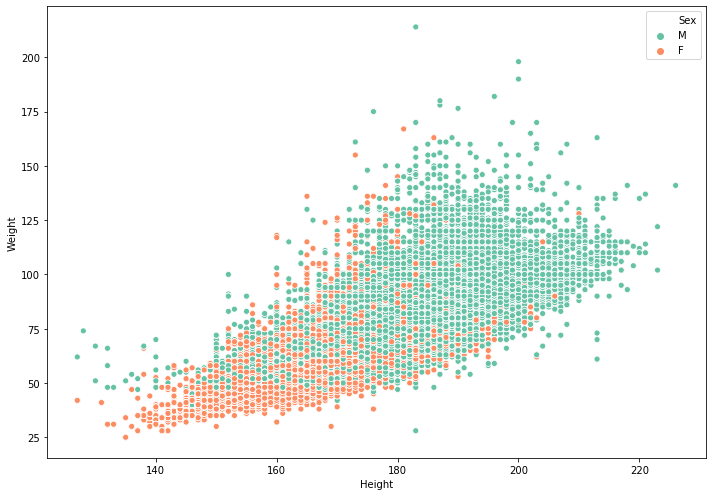

In [18]:
plt.figure(figsize=(10,7))
sn.scatterplot(x='Height', y='Weight', hue='Sex', data=olympics, palette='Set2')
plt.tight_layout()  

### height vs. age by sex

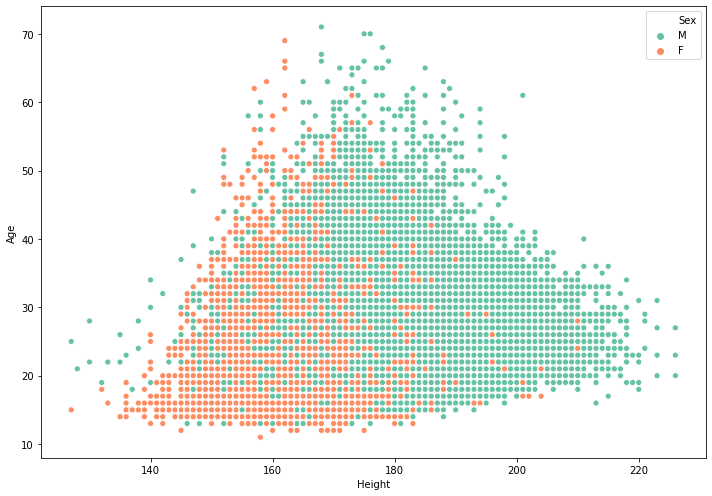

In [21]:
plt.figure(figsize=(10,7))
sn.scatterplot(x='Height', y='Age', hue='Sex', data=olympics, palette='Set2')
plt.tight_layout()  

### weight vs. age by sex

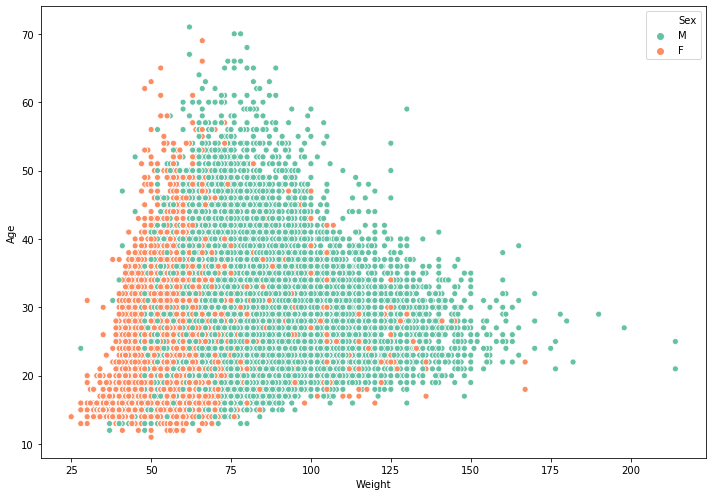

In [22]:
plt.figure(figsize=(10,7))
sn.scatterplot(x='Weight', y='Age', hue='Sex', data=olympics, palette='Set2')
plt.tight_layout()  

* For all 3 scatter plots,  male ahtletes are more clustered to the right of female ahtletes
___
Let us explore how the average age, height and weight changes throughout the Olympic games

### average age over time (by sex)

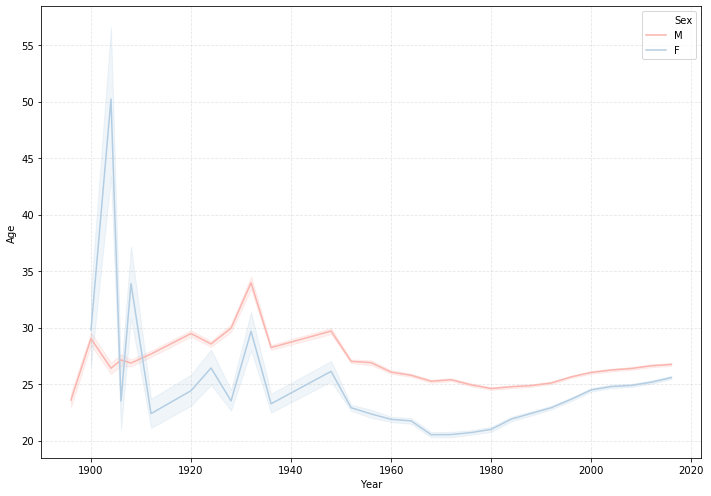

In [23]:
plt.figure(figsize=(10,7))
sn.lineplot(x='Year', y='Age', hue='Sex', data=olympics, palette='Pastel1')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()   

* Average age of male Olympic athletes are consistently higher than female Olympic athletes starting from the year 1912
* Female Olympic athletes were, on average, a lot older than male athletes in two instances of the very early 1900's. Let us explore why:

In [32]:
olympics[olympics['Year']<1910].groupby(['Sex','Sport'])['Name'].count()

Sex  Sport         
F    Archery             41
     Croquet              6
     Equestrianism        2
     Figure Skating       8
     Golf                10
     Motorboating         1
     Sailing              4
     Tennis              35
M    Archery            138
     Athletics         1789
     Basque Pelota        2
     Boxing              66
     Cricket             24
     Croquet             13
     Cycling            601
     Diving              76
     Equestrianism       77
     Fencing            761
     Figure Skating      15
     Football           188
     Golf               117
     Gymnastics        1195
     Hockey              68
     Jeu De Paume        11
     Lacrosse            60
     Motorboating        16
     Polo                33
     Racquets            12
     Roque                4
     Rowing             466
     Rugby               77
     Sailing            340
     Shooting          1050
     Swimming           441
     Tennis             224


* So it looks like male athletes were able to participate in a lot more Olympic games than female athletes in the past. Also, most sports that female athletes were able to participate in, are less-athletic (e.g. archery). Thus, average age of female athletes at the time was a lot higher

### average height over time (by sex)

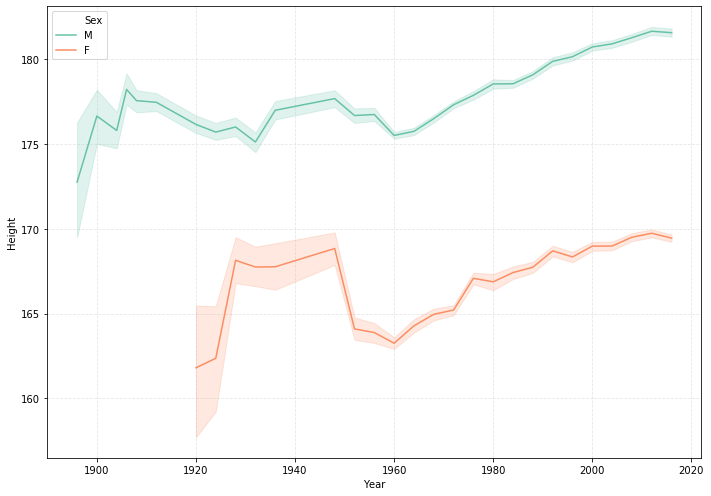

In [24]:
plt.figure(figsize=(10,7))
sn.lineplot(x='Year', y='Height', hue='Sex', data=olympics, palette='Set2')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()   

* Average heights of male Olympic athletes are consistently higher than the average heights of female Olympic athletes
* Increasing trend in average heights of both sexes

### average weight over time (by sex)

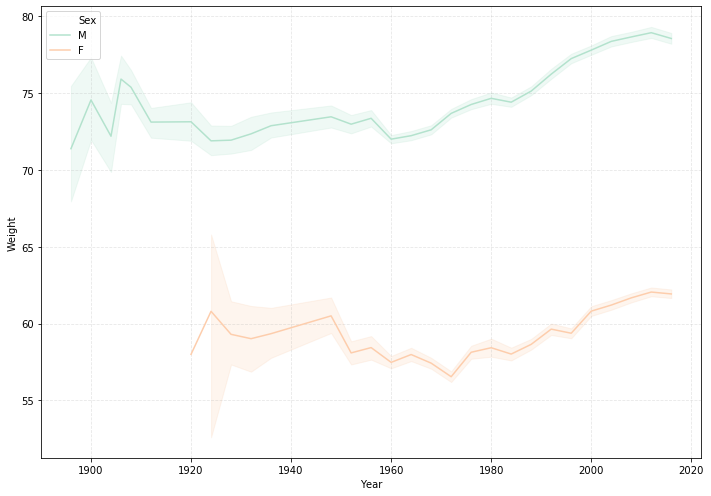

In [25]:
plt.figure(figsize=(10,7))
sn.lineplot(x='Year', y='Weight', hue='Sex', data=olympics, palette='Pastel2')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()   

* As weight and height are strongly correlated, the observations for average weight is very similar to the observations for average height
___
Let us explore how the count of certain variables change over time

### number of participating regions and Olympic events over time

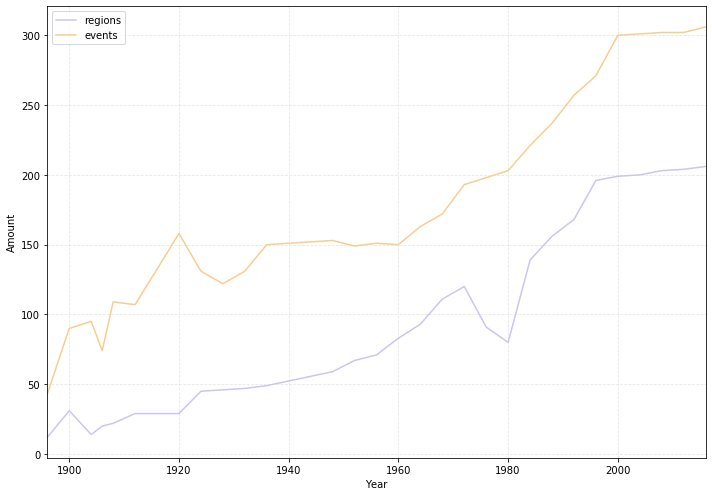

In [30]:
# Get count of teams and events for each year
num_regions = olympics.groupby(['Year'])['region'].nunique()
num_events = olympics.groupby(['Year'])['Event'].nunique()

plt.figure(figsize=(10,7))
num_regions.plot(color='#CDC5ED')
num_events.plot(color='#F7CE8E')
plt.grid(alpha=0.3, linestyle='--')
plt.ylabel('Amount')
plt.legend(labels=['regions', 'events'])
plt.tight_layout() 

* Increasing trend in the number of participating regions  and in the number of Olympic events
* Curious sudden decrease in participating regions in the 1980 Summer Olympics
    * After some research, it turns out that the 1980 Olympics were held in Moscow, and so, there were 66 countries that boycotted the games because of the Soviet-Afghan War

### number of female vs. male athletes

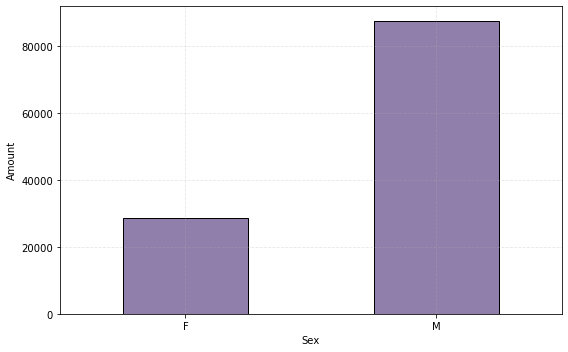

In [31]:
num_sexes = olympics.groupby(['Sex'])['Name'].nunique()
plt.figure(figsize=(8,5))

# Create bar graph
num_sexes.plot.bar(color='#917FAB', edgecolor='black')

# Rotate markers on x-axis
plt.xticks(rotation = 0)

plt.grid(alpha=0.3, linestyle='--')
plt.ylabel('Amount')
plt.tight_layout()

* Significantly more male Olympic atheletes than female Olympic athletes

#### number of female vs. male athletes over time

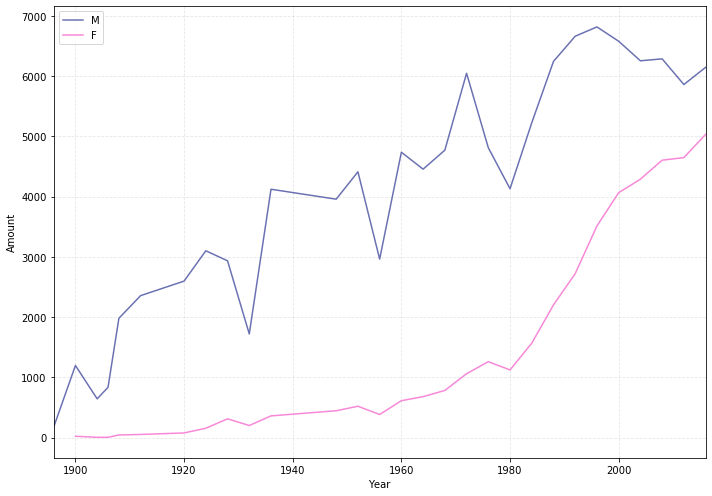

In [32]:
# Create data frames with only male athletes
males = olympics[olympics['Sex']=='M']
# Create data frames with only female athletes
females= olympics[olympics['Sex']=='F']
# Get the count of athletes in each year
num_males = males.groupby(['Year'])['Name'].nunique()
num_females = females.groupby(['Year'])['Name'].nunique()

plt.figure(figsize=(10,7))
num_males.plot(color='#6A71B2')
num_females.plot(color='#F788D7')
plt.grid(alpha=0.3, linestyle='--')
plt.ylabel('Amount')
plt.legend(loc='upper left', labels=['M', 'F'])
plt.tight_layout()

* Consistently more male athletes than female ahtletes
* Looks like female ahtletes started competing in 1900, while male athletes started competing in 1896
___

Let us explore the distributions of age, height, and weight by sport, limited to the 21st century

### distribution of age by sport

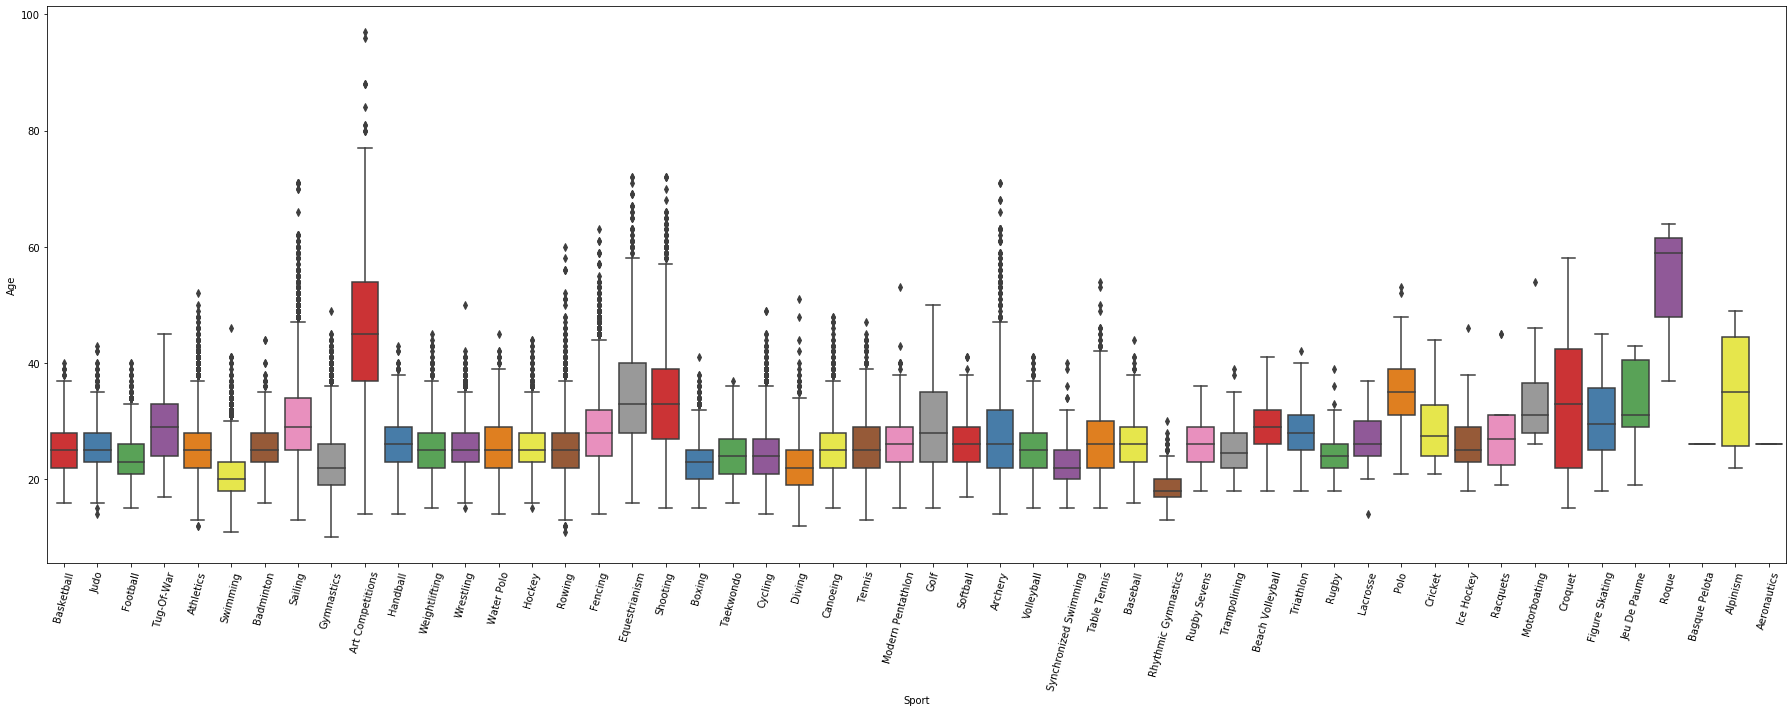

In [33]:
plt.figure(figsize=(25,10))
sn.boxplot(x='Sport',y='Age', data=olympics, palette='Set1')
plt.xticks(rotation = 75)
plt.tight_layout()

* On average, roque players are older than other Olympic athletes, while rhythmic gymnasts are, on average, younger than other Olympic athletes
* Art competitions have the highest variation of age
* Less-athletic sports tend to have higher variations of age than more athletic sports

### distribution of height by sport

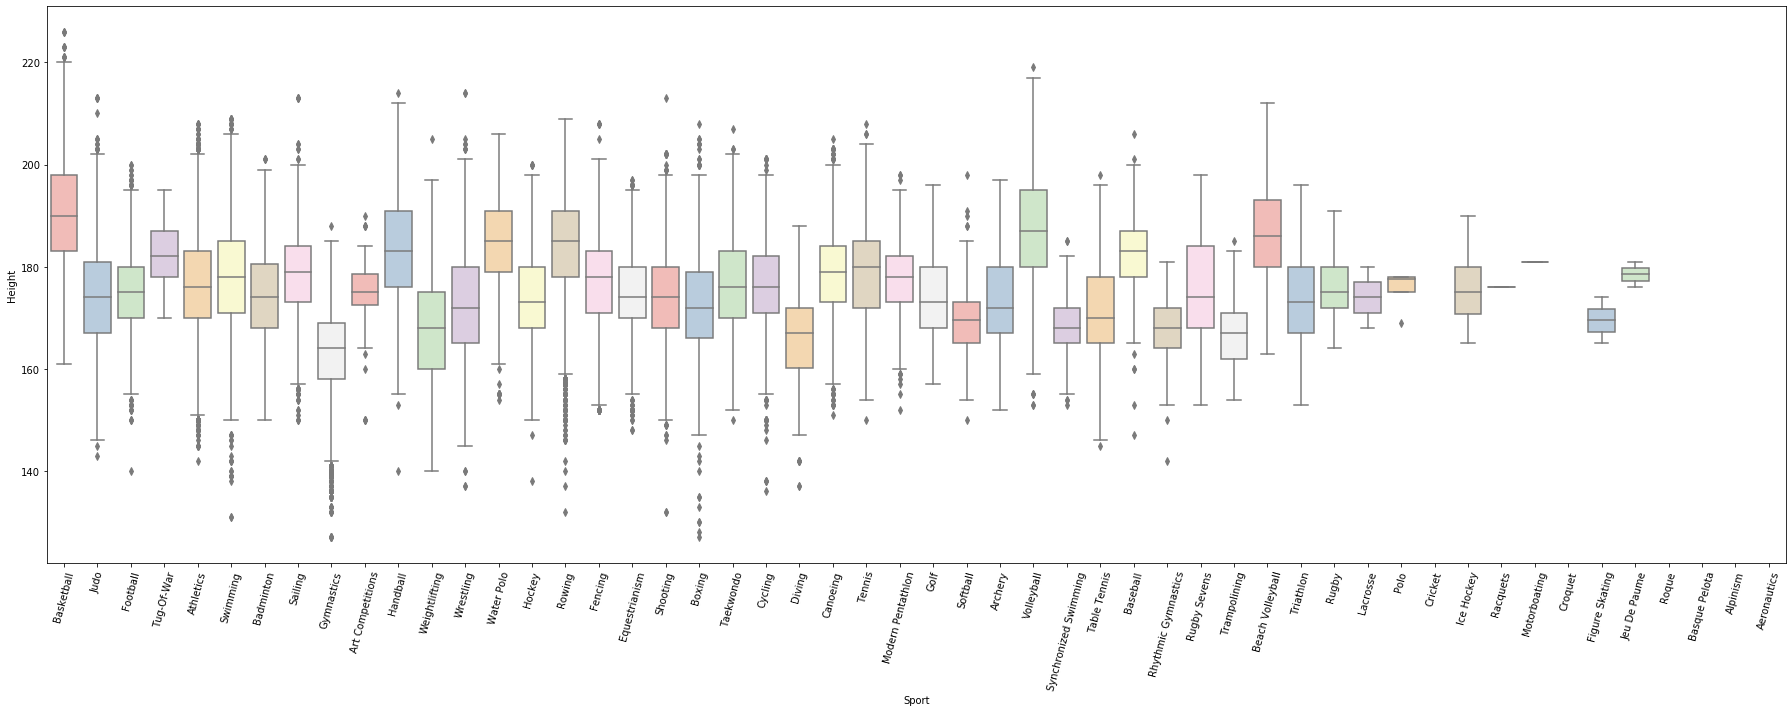

In [34]:
plt.figure(figsize=(25,10))
sn.boxplot(x='Sport',y='Height', data=olympics, palette='Pastel1')
plt.xticks(rotation = 75)
plt.tight_layout()

* On average, Olympic basketball players are taller than other Olympic athletes, while Olympic gymnasts are shorter than other Olympic ahtletes

### distribution of weight by sport

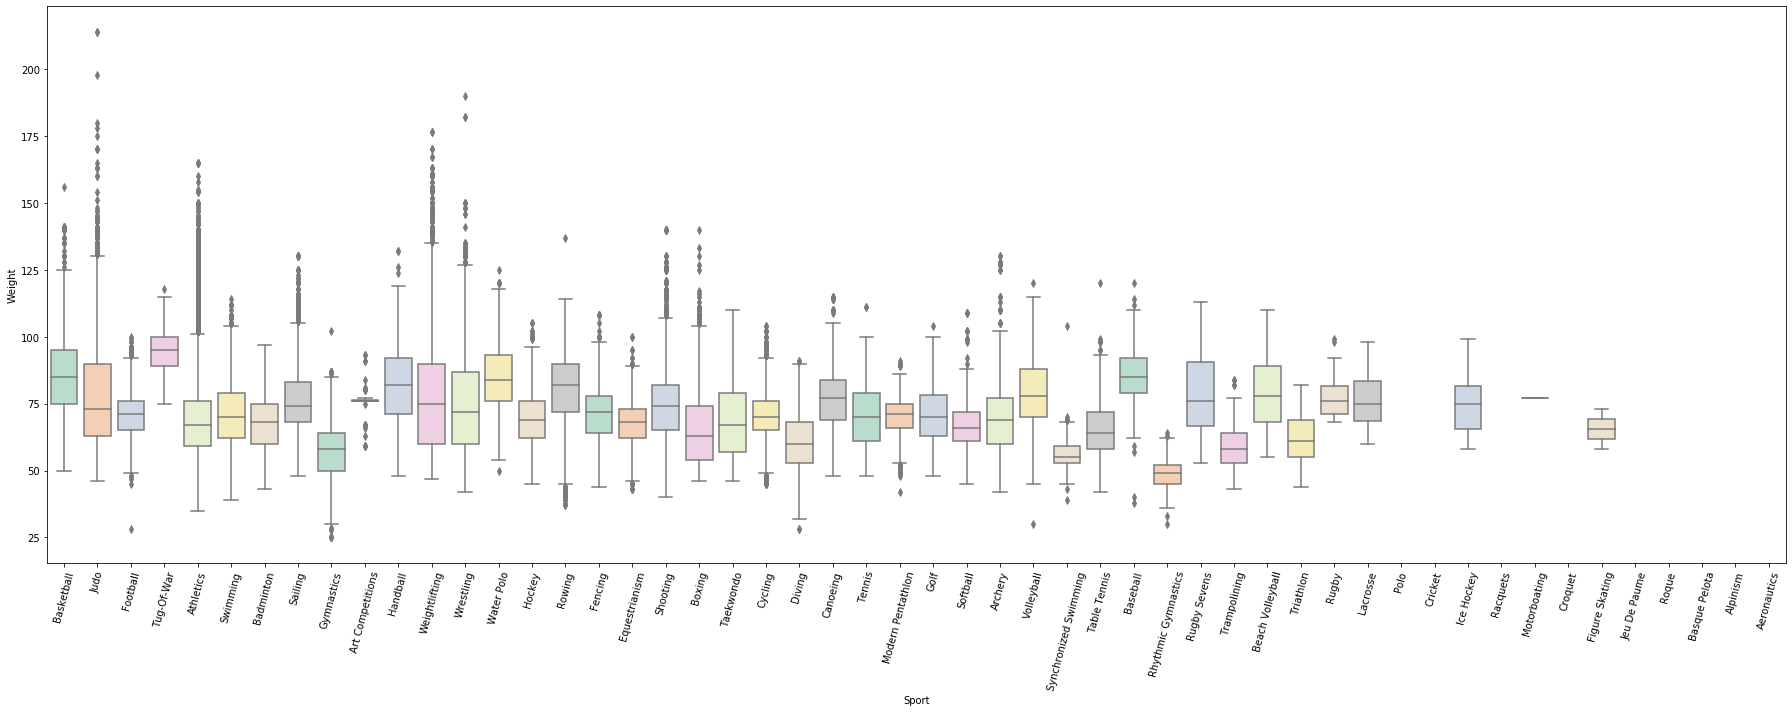

In [35]:
plt.figure(figsize=(25,10))
sn.boxplot(x='Sport', y='Weight', data=olympics, palette='Pastel2')
plt.xticks(rotation = 75)
plt.tight_layout()

* On average, Olympic rhythmic gymnasts are lighter than other Olympic athletes, but there is no clear observation that athletes of a particular sport are heavier than others, on average
* As expected, Olympic sports with different weight classes will have higher variations of weight
___
Let us explore how some variables affect the number of medals for a few select sports
### gymnastics: medal vs height

* Are shorter gymnasts more likely to win a medal?

#### female gymnasts

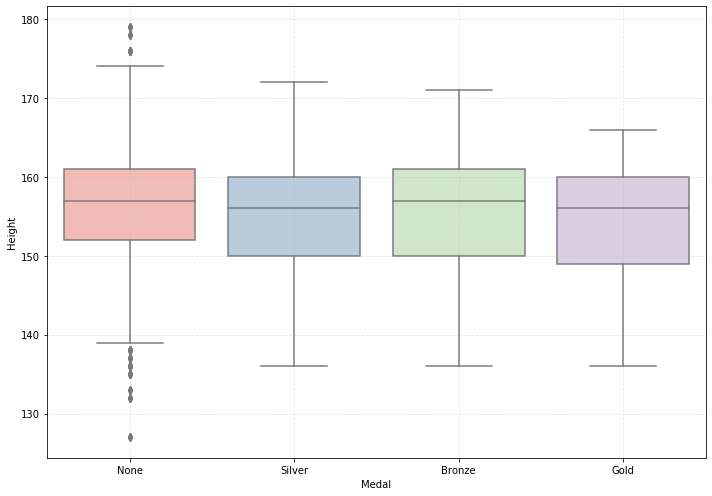

In [36]:
# data frame of only female gymnasts
f_gymnasts = olympics.loc[(olympics['Sport']=='Gymnastics') & (olympics['Sex']=='F')]

plt.figure(figsize=(10,7))
sn.boxplot(x='Medal', y='Height', data=f_gymnasts, palette='Pastel1')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

* There seems to be quite a few outliers
* It seems that  age regulations in gymnastic events have been changed in 1997 where gymnasts must now be 16 or older, so let us only analyze data from 1997 and beyond

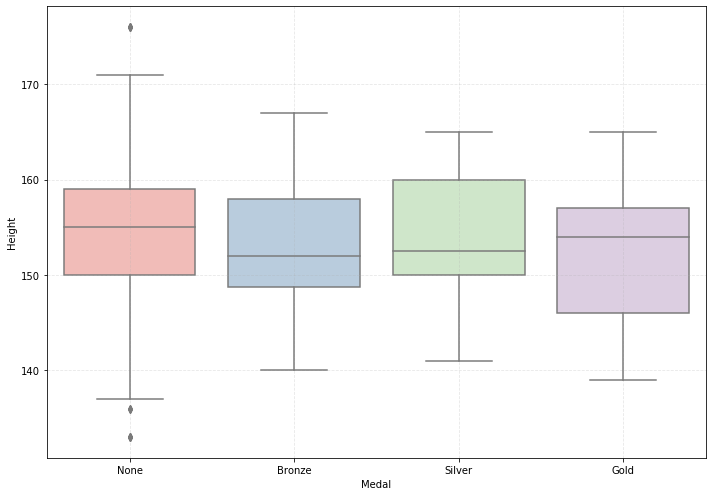

In [37]:
f_gymnasts = olympics.loc[(olympics['Sport']=='Gymnastics') & (olympics['Sex']=='F') & (olympics['Year']>1997)]
plt.figure(figsize=(10,7))
sn.boxplot(x='Medal', y='Height', data=f_gymnasts, palette='Pastel1')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

* On average, medal-winners are shorter than non-medalists
* Gold-medalists have the lowest quartiles, so there are more gold-medalists who are under ~157 cm tall, and more gold-medalists who are under ~146 cm tall
* All medalists are under ~165-167 cm tall, so it may be less likely for anyone taller than ~165-167 cm to win a medal
* Non-medalists varies the most in height, while silver-medalists varies the least in height

#### male gymnasts

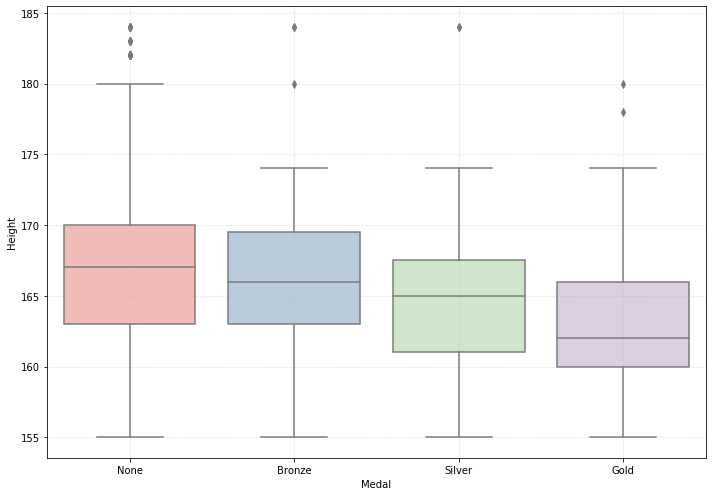

In [38]:
m_gymnasts = olympics.loc[(olympics['Sport']=='Gymnastics') & (olympics['Sex']=='M') & (olympics['Year']>1997)]
plt.figure(figsize=(10,7))
sn.boxplot(x='Medal',y='Height', data=m_gymnasts, palette='Pastel1')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

* On average, medalists are shorter than non-medalists
* On average, the more valuable the medal, the shorter the gymnast. So gold-medalists are, on average, shorter than the rest, while non-medalists are, on average, taller than the rest
* Gold, silver, and bronze have equal variations of height, while non-medalists have a much higher variation of height
* The more valuable the medal, the lower the quartiles. So, non-medalists are more concentrated at taller heights, while gold-medalists are more concentrated at shorter heights
* Outliers aside, every medalist is under ~174 cm tall, so anyone taller than ~174 cm are less likely to win a medal
* Gold-medalists' height distribution is the most skewed right

#### conclusions
* On average, medalists tend to be shorter than non-medalists

### art competitions (1948): medal vs. age

* Assuming that older age means more experience and less athleticism, I chose a less-athletic sport with a relatively high variation of age  to see if experience overpowers athlecticism (hand-eye coordination). I only chose to analysis a single year to prevent repeats of the same competitor at different ages
* Note: all art competition events are mixed-sex

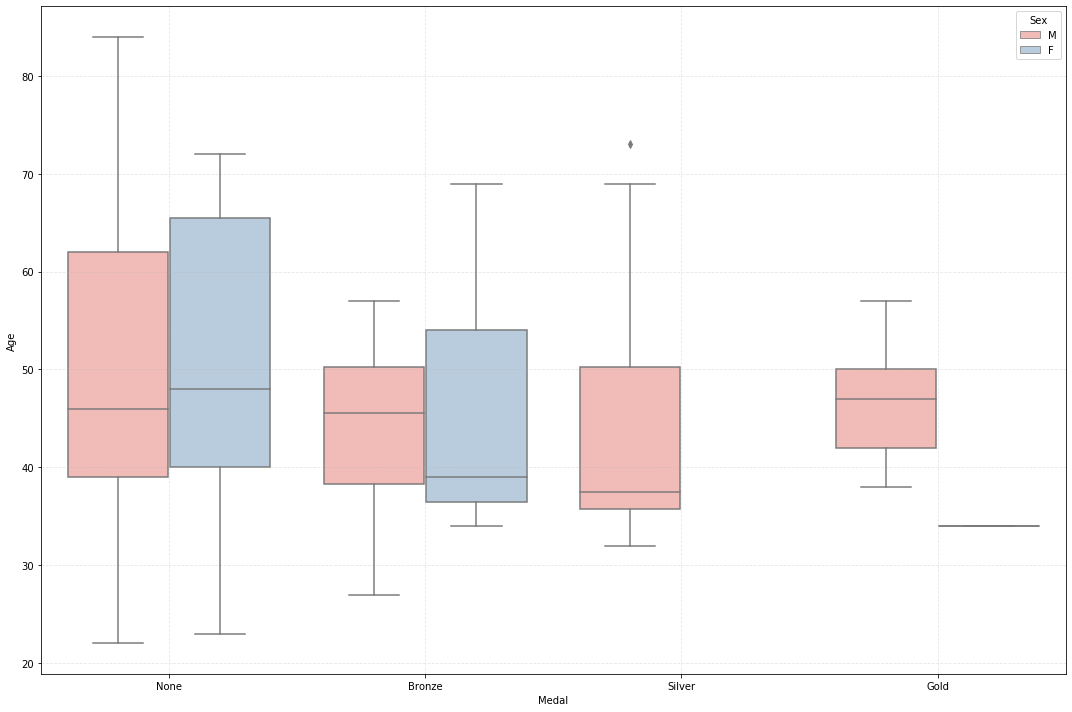

In [39]:
# data frame of athletes that participate in archery
artists = olympics.loc[(olympics['Sport']=='Art Competitions')&(olympics['Year']==1948)]

plt.figure(figsize=(15,10))
sn.boxplot(x='Medal', y='Age', hue='Sex', data=artists, palette='Pastel1')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

* Non-medalists have the highest variation of age
* Nothing suggests that age has a strong influence on winning whatever medal
* Looks like male art competitors are more likely to win silver or gold medals
___

Let us find which countries are the top gold-winners and which countries have the most medals

### top 10 gold medal winners (by country)

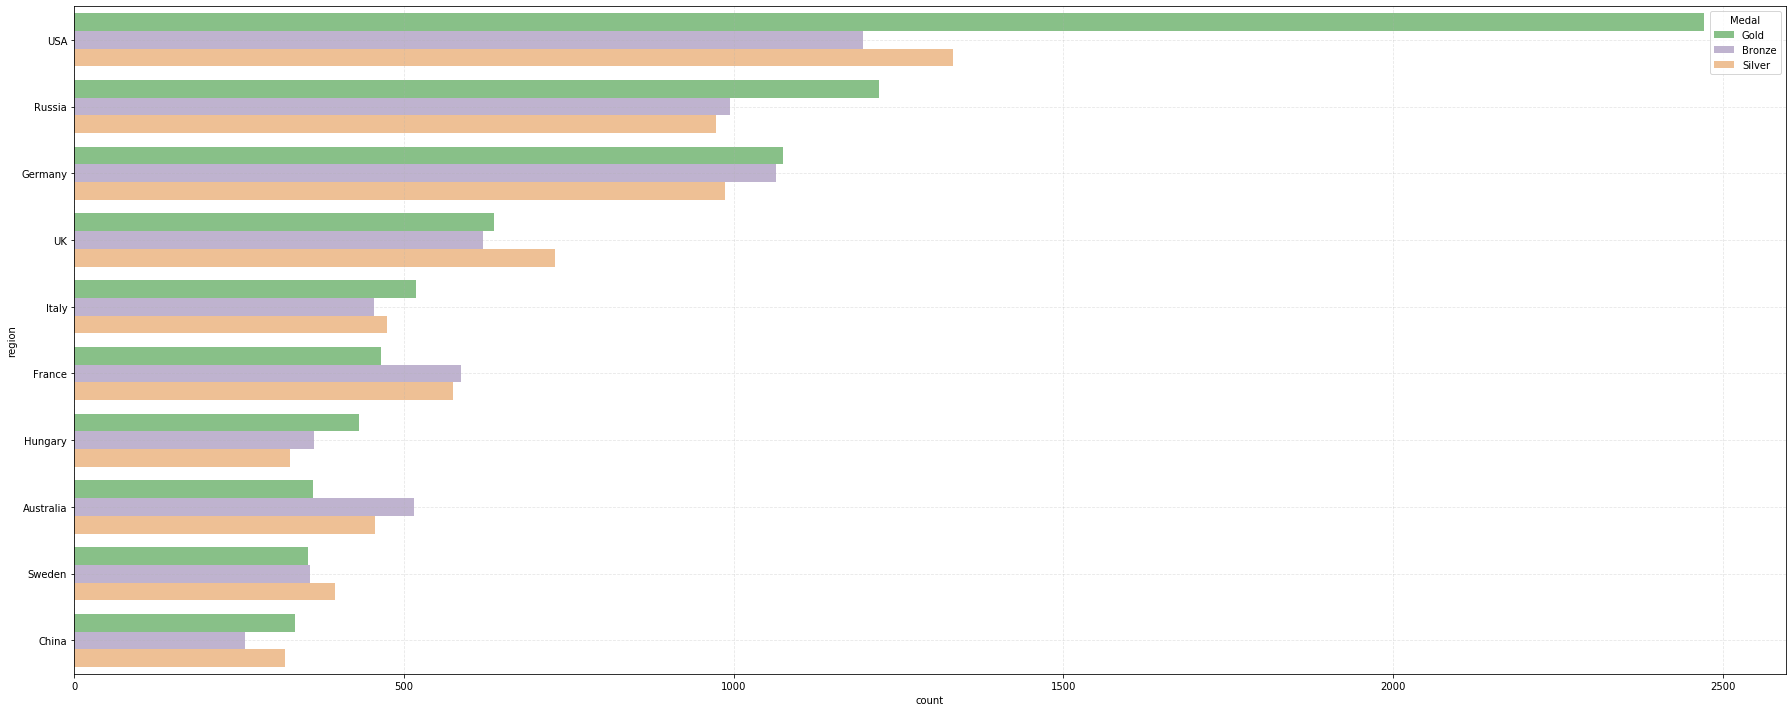

In [88]:
# Create data frame with no "None" medals
medals = olympics[olympics['Medal'].isin(['Bronze','Silver','Gold'])]
# Create a sorted frequency table of medals by region
num_medals = pd.crosstab(medals['region'], medals['Medal']).sort_values('Gold', ascending=False).index

plt.figure(figsize=(25,10))

# Create a grouped bar graph limited to the top 10 regions
sn.countplot(y='region', hue='Medal', data=medals, order=num_medals[:10], palette='Accent')

plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

### top 10 overall medal winners (by country)

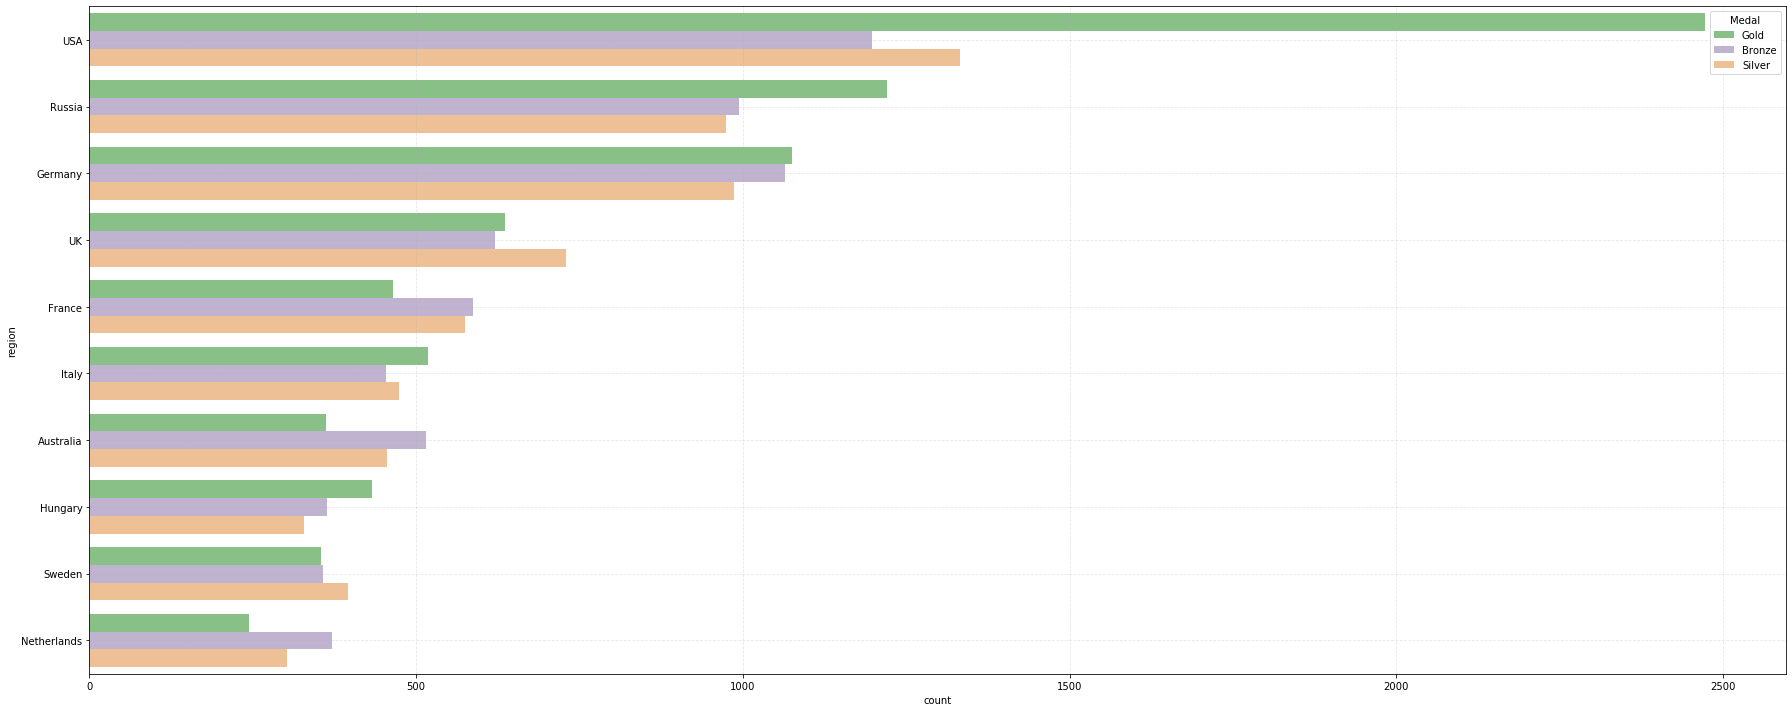

In [97]:
# Get a sorted count of medals for each region
num_medals2 = medals.groupby('region')['Medal'].count().sort_values(ascending=False).index

plt.figure(figsize=(25,10))
sn.countplot(y='region', hue='Medal', data=medals, order=num_medals2[:10], palette='Accent')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

#### concluding observations for medals

* 1st place USA has about double number of gold medals as 2nd place Russia
* Top 4 regions is the same for top gold medals and top overall medals
* Italy/Hungary has more gold medals than France/Australia, but France/Australia has more overall medals
* China is in the top 10 for gold medals, but not in the top 10 for overall medals, as Netherlands took the 10th spot